In [1]:
#Code to give aacess Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import yaml

data_config = {
    'train': '/content/drive/MyDrive/detection/images/train',
    'val': '/content/drive/MyDrive/detection/images/val',
    'test': '/content/drive/MyDrive/detection/images/test',
    'nc': 1,
    'names': ['pineapple']
}

with open('data.yaml', 'w') as file:
    yaml.dump(data_config, file)


In [3]:
#Install YOLOV8 Ultralytics
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 68.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 57.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 858.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 69.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [4]:
from ultralytics import YOLO

model = YOLO('yolov8n.yaml')  # Choose model variant

model.train(
    data='/content/data.yaml',
    epochs=100,
    imgsz=224,
    batch=16,
    lr0=0.001,             # Initial learning rate
    weight_decay=0.0005,   # Prevent overfitting
    optimizer='Adam'       # Use Adam optimizer
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.155 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_wid

100%|██████████| 755k/755k [00:00<00:00, 23.1MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

YOLOv8n summary: 129 layers, 3,011,043 parameters, 3,011,027 gradients, 8.2 GFLOPs

Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 101MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.4±0.1 ms, read: 0.5±0.2 MB/s, size: 209.2 KB)


train: Scanning /content/drive/MyDrive/detection/labels/train.cache... 1528 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1528/1528 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.4±0.2 ms, read: 0.5±0.1 MB/s, size: 196.4 KB)


val: Scanning /content/drive/MyDrive/detection/labels/val.cache... 230 images, 0 backgrounds, 0 corrupt: 100%|██████████| 230/230 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: Adam(lr=0.001, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100     0.324G      3.452      2.855      3.253         14        224: 100%|██████████| 96/96 [06:53<00:00,  4.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.89it/s]

                   all        230        236     0.0173      0.581     0.0232    0.00413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100     0.342G      2.781      2.509       2.71         24        224: 100%|██████████| 96/96 [00:17<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.29it/s]


                   all        230        236      0.179      0.318      0.128     0.0394

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100     0.342G      2.398       2.17      2.433         16        224: 100%|██████████| 96/96 [00:18<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.35it/s]

                   all        230        236      0.672      0.576      0.651      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100     0.342G      2.159      1.936      2.246         18        224: 100%|██████████| 96/96 [00:17<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.35it/s]

                   all        230        236      0.608      0.526      0.559      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100     0.342G      2.027      1.788      2.124         19        224: 100%|██████████| 96/96 [00:18<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.61it/s]

                   all        230        236      0.833      0.551      0.699      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100     0.342G      1.893      1.648      2.042         18        224: 100%|██████████| 96/96 [00:17<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.85it/s]

                   all        230        236      0.863      0.496      0.616      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100     0.342G      1.765       1.53      1.931         21        224: 100%|██████████| 96/96 [00:17<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.01it/s]

                   all        230        236       0.96      0.661      0.837      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100     0.342G      1.741      1.451      1.893         21        224: 100%|██████████| 96/96 [00:17<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.84it/s]

                   all        230        236      0.931      0.517       0.71      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100     0.359G       1.68      1.375      1.836         14        224: 100%|██████████| 96/96 [00:17<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.01it/s]

                   all        230        236      0.812      0.713        0.8      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100     0.377G      1.658      1.344      1.816         13        224: 100%|██████████| 96/96 [00:17<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.53it/s]

                   all        230        236      0.802      0.784      0.844      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100     0.393G      1.559      1.283      1.757         18        224: 100%|██████████| 96/96 [00:17<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.56it/s]


                   all        230        236      0.519      0.407      0.413      0.194

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100     0.393G      1.554      1.245      1.744         18        224: 100%|██████████| 96/96 [00:18<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.45it/s]

                   all        230        236      0.648      0.445      0.453       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100     0.393G      1.538      1.202      1.723         18        224: 100%|██████████| 96/96 [00:16<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.71it/s]

                   all        230        236      0.921      0.831      0.904      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      0.41G      1.505      1.171      1.686         14        224: 100%|██████████| 96/96 [00:18<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.80it/s]

                   all        230        236      0.872      0.818      0.876      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100     0.428G       1.48      1.139      1.679         18        224: 100%|██████████| 96/96 [00:17<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.94it/s]

                   all        230        236      0.884      0.873      0.906      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100     0.443G      1.434      1.093      1.648         19        224: 100%|██████████| 96/96 [00:17<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.37it/s]

                   all        230        236      0.882      0.794      0.866      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100     0.443G      1.461      1.095       1.65         13        224: 100%|██████████| 96/96 [00:16<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.50it/s]

                   all        230        236      0.878       0.82      0.882      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100     0.443G      1.406      1.089      1.619         11        224: 100%|██████████| 96/96 [00:17<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.36it/s]

                   all        230        236      0.901      0.773      0.855      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100     0.443G      1.407      1.049      1.611         18        224: 100%|██████████| 96/96 [00:17<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.43it/s]

                   all        230        236      0.872       0.78      0.846      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100     0.443G      1.413       1.06      1.624         17        224: 100%|██████████| 96/96 [00:17<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.87it/s]

                   all        230        236       0.89      0.788      0.869      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100     0.443G      1.387      1.018      1.595         13        224: 100%|██████████| 96/96 [00:18<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.52it/s]

                   all        230        236      0.866      0.847      0.878      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100     0.443G      1.367      1.004      1.586         15        224: 100%|██████████| 96/96 [00:17<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.56it/s]

                   all        230        236      0.964      0.839      0.927      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100     0.443G       1.36      1.006      1.578         18        224: 100%|██████████| 96/96 [00:17<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.90it/s]

                   all        230        236        0.9      0.873      0.892       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100     0.443G      1.349     0.9797      1.567         16        224: 100%|██████████| 96/96 [00:17<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.51it/s]

                   all        230        236      0.927      0.894      0.925      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100     0.443G       1.34     0.9626      1.562         18        224: 100%|██████████| 96/96 [00:17<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.08it/s]

                   all        230        236      0.943      0.834       0.92      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100     0.443G       1.33     0.9522      1.543         17        224: 100%|██████████| 96/96 [00:17<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.66it/s]

                   all        230        236      0.967      0.877      0.961      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100     0.443G      1.321     0.9456      1.537         16        224: 100%|██████████| 96/96 [00:17<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.63it/s]

                   all        230        236      0.891      0.864      0.902      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100     0.443G      1.318     0.9483      1.544         16        224: 100%|██████████| 96/96 [00:18<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.76it/s]

                   all        230        236      0.952      0.845      0.932      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100     0.443G      1.294     0.9189      1.531         11        224: 100%|██████████| 96/96 [00:16<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.56it/s]

                   all        230        236      0.976      0.915      0.964      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100     0.443G      1.297     0.8969      1.524         22        224: 100%|██████████| 96/96 [00:17<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.53it/s]

                   all        230        236      0.894      0.891       0.95      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100     0.443G      1.286     0.9036       1.52         24        224: 100%|██████████| 96/96 [00:16<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.79it/s]

                   all        230        236      0.968      0.888      0.933      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100     0.443G      1.309     0.8937      1.528         18        224: 100%|██████████| 96/96 [00:17<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.89it/s]

                   all        230        236      0.932      0.813      0.918      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100     0.443G      1.264     0.8919        1.5         21        224: 100%|██████████| 96/96 [00:16<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.56it/s]

                   all        230        236      0.974      0.942      0.971      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100     0.443G      1.236     0.8356      1.477         17        224: 100%|██████████| 96/96 [00:17<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.64it/s]

                   all        230        236      0.943      0.908      0.948      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100     0.443G      1.259     0.8679      1.492         15        224: 100%|██████████| 96/96 [00:18<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.75it/s]

                   all        230        236      0.956      0.919      0.969      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100     0.443G       1.24     0.8504      1.473         18        224: 100%|██████████| 96/96 [00:16<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.43it/s]

                   all        230        236      0.966      0.869      0.961      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100     0.443G      1.206     0.8418      1.456         17        224: 100%|██████████| 96/96 [00:17<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.59it/s]

                   all        230        236      0.923      0.949      0.958      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100     0.443G      1.219     0.8432      1.457         15        224: 100%|██████████| 96/96 [00:17<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.91it/s]

                   all        230        236      0.844      0.846      0.914      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100     0.443G      1.231     0.8333      1.471         22        224: 100%|██████████| 96/96 [00:17<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.11it/s]

                   all        230        236      0.974      0.886      0.912       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100     0.443G      1.207     0.8334      1.453         21        224: 100%|██████████| 96/96 [00:17<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.79it/s]

                   all        230        236      0.972      0.941      0.967      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100     0.443G      1.202     0.8199       1.45         20        224: 100%|██████████| 96/96 [00:17<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.17it/s]


                   all        230        236      0.956      0.873       0.93      0.535

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100     0.443G       1.21      0.813      1.461         11        224: 100%|██████████| 96/96 [00:18<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.70it/s]

                   all        230        236      0.961      0.941      0.962      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100     0.443G      1.212     0.8085      1.454         19        224: 100%|██████████| 96/96 [00:17<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.64it/s]

                   all        230        236      0.986      0.941      0.963      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100     0.443G       1.19     0.7979      1.449         17        224: 100%|██████████| 96/96 [00:18<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.59it/s]

                   all        230        236       0.91      0.948      0.943      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100     0.443G      1.178     0.7868      1.441         14        224: 100%|██████████| 96/96 [00:17<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.92it/s]

                   all        230        236      0.965      0.936       0.96      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100     0.443G       1.17     0.7876       1.43         19        224: 100%|██████████| 96/96 [00:17<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.93it/s]

                   all        230        236      0.912      0.923      0.946      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100     0.443G      1.172     0.7675      1.436         13        224: 100%|██████████| 96/96 [00:17<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.71it/s]

                   all        230        236       0.96      0.953      0.954      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100     0.443G      1.137     0.7554      1.401         17        224: 100%|██████████| 96/96 [00:17<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.64it/s]

                   all        230        236      0.965      0.928      0.959      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100     0.443G      1.146     0.7557      1.403         20        224: 100%|██████████| 96/96 [00:17<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.84it/s]

                   all        230        236      0.947      0.958      0.979      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100     0.443G      1.141     0.7612       1.41         15        224: 100%|██████████| 96/96 [00:17<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.35it/s]

                   all        230        236      0.927      0.912      0.951      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100     0.443G      1.152     0.7572      1.414         18        224: 100%|██████████| 96/96 [00:18<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.45it/s]

                   all        230        236      0.916      0.945      0.958      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100     0.443G      1.133     0.7514      1.405         12        224: 100%|██████████| 96/96 [00:17<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.40it/s]

                   all        230        236       0.91      0.945      0.947      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100     0.443G       1.12     0.7363      1.388         16        224: 100%|██████████| 96/96 [00:18<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.73it/s]

                   all        230        236      0.967      0.945      0.974      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100     0.443G      1.116     0.7281      1.387         18        224: 100%|██████████| 96/96 [00:17<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.62it/s]

                   all        230        236      0.908      0.924      0.945      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100     0.443G      1.108     0.7243      1.382         18        224: 100%|██████████| 96/96 [00:18<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.66it/s]

                   all        230        236      0.928      0.966      0.961      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100     0.443G      1.104     0.7143      1.377         18        224: 100%|██████████| 96/96 [00:17<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.66it/s]

                   all        230        236       0.94      0.945      0.961       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100     0.443G      1.112     0.7199      1.375         17        224: 100%|██████████| 96/96 [00:17<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.19it/s]

                   all        230        236      0.959      0.936      0.958      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100     0.443G       1.08     0.6936      1.365         21        224: 100%|██████████| 96/96 [00:17<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.70it/s]

                   all        230        236      0.928      0.935      0.959       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100     0.443G      1.126     0.7177       1.39         16        224: 100%|██████████| 96/96 [00:17<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.14it/s]

                   all        230        236      0.962      0.949      0.973      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100     0.443G      1.095     0.7124      1.378         17        224: 100%|██████████| 96/96 [00:18<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.44it/s]

                   all        230        236      0.912      0.903      0.942      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100     0.443G      1.104     0.7116       1.38         25        224: 100%|██████████| 96/96 [00:17<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.54it/s]

                   all        230        236      0.959      0.928      0.966      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100     0.443G      1.109      0.719      1.384         15        224: 100%|██████████| 96/96 [00:19<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.53it/s]

                   all        230        236      0.943      0.873      0.925      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100     0.443G      1.075     0.7092      1.365         14        224: 100%|██████████| 96/96 [00:17<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.73it/s]

                   all        230        236      0.982      0.945      0.972      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100     0.443G      1.041     0.6902      1.356         16        224: 100%|██████████| 96/96 [00:18<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.19it/s]

                   all        230        236      0.963      0.958      0.966      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100     0.443G      1.068     0.6838      1.362         15        224: 100%|██████████| 96/96 [00:17<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.73it/s]

                   all        230        236      0.973        0.9      0.947      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100     0.443G      1.077     0.6846      1.357         20        224: 100%|██████████| 96/96 [00:17<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.97it/s]

                   all        230        236      0.945      0.958      0.968      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100     0.443G      1.046      0.672      1.341         23        224: 100%|██████████| 96/96 [00:17<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.39it/s]

                   all        230        236      0.929      0.936      0.955      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100     0.443G      1.085     0.6897      1.364         20        224: 100%|██████████| 96/96 [00:17<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.80it/s]

                   all        230        236      0.976      0.945      0.958      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100     0.443G      1.066     0.6783      1.355         14        224: 100%|██████████| 96/96 [00:17<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.97it/s]

                   all        230        236      0.957      0.941      0.961      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100     0.443G      1.047     0.6642      1.341         26        224: 100%|██████████| 96/96 [00:17<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.32it/s]

                   all        230        236      0.962      0.907      0.952      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100     0.443G      1.061     0.6903      1.354         13        224: 100%|██████████| 96/96 [00:18<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.74it/s]

                   all        230        236      0.935      0.932      0.958      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100     0.443G      1.044     0.6639      1.341         17        224: 100%|██████████| 96/96 [00:17<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.78it/s]

                   all        230        236      0.955      0.915      0.958      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100     0.443G      1.042     0.6678      1.327         19        224: 100%|██████████| 96/96 [00:18<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.39it/s]

                   all        230        236      0.973      0.869       0.96      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100     0.443G      1.047     0.6677      1.341         17        224: 100%|██████████| 96/96 [00:17<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.65it/s]

                   all        230        236      0.986      0.916      0.961      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100     0.443G     0.9883     0.6395      1.316         15        224: 100%|██████████| 96/96 [00:18<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.97it/s]

                   all        230        236      0.955      0.932      0.945      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100     0.443G      1.033     0.6448      1.328         17        224: 100%|██████████| 96/96 [00:17<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.89it/s]

                   all        230        236      0.943      0.945      0.954      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100     0.443G     0.9989      0.635      1.307         22        224: 100%|██████████| 96/96 [00:18<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.94it/s]

                   all        230        236      0.951      0.941       0.96      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100     0.443G      1.001     0.6352       1.31         12        224: 100%|██████████| 96/96 [00:17<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.50it/s]

                   all        230        236      0.997      0.928      0.972      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100     0.443G      1.021     0.6411      1.325         18        224: 100%|██████████| 96/96 [00:17<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.55it/s]

                   all        230        236      0.971      0.928      0.958      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100     0.443G      1.019     0.6385      1.323         20        224: 100%|██████████| 96/96 [00:18<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.36it/s]

                   all        230        236      0.961      0.953      0.973      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100     0.443G       0.99     0.6389      1.305         16        224: 100%|██████████| 96/96 [00:17<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.60it/s]

                   all        230        236      0.966      0.928      0.967      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100     0.443G     0.9964     0.6286      1.312         16        224: 100%|██████████| 96/96 [00:18<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.48it/s]

                   all        230        236      0.964      0.907      0.961      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100     0.443G     0.9759     0.6168      1.298         16        224: 100%|██████████| 96/96 [00:17<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.70it/s]

                   all        230        236      0.923      0.941       0.96      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100     0.443G     0.9959     0.6183      1.297         18        224: 100%|██████████| 96/96 [00:18<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.18it/s]

                   all        230        236       0.97      0.953      0.976      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100     0.443G     0.9891     0.6128      1.308         21        224: 100%|██████████| 96/96 [00:17<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.29it/s]

                   all        230        236      0.996      0.928      0.973      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100     0.443G     0.9768      0.612      1.292         16        224: 100%|██████████| 96/96 [00:17<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.90it/s]

                   all        230        236      0.999      0.966      0.976      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100     0.443G     0.9809     0.6198      1.305         16        224: 100%|██████████| 96/96 [00:17<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.91it/s]

                   all        230        236      0.949      0.955      0.974      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100     0.443G     0.9806     0.6109      1.301         24        224: 100%|██████████| 96/96 [00:17<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.96it/s]

                   all        230        236      0.998      0.953      0.976      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100     0.443G     0.9673     0.6087      1.294         18        224: 100%|██████████| 96/96 [00:17<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.04it/s]

                   all        230        236      0.987       0.97      0.975       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100     0.443G     0.9768     0.6106      1.292         29        224: 100%|██████████| 96/96 [00:17<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.09it/s]

                   all        230        236      0.962       0.97      0.974      0.584


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100     0.443G     0.8578     0.4863      1.198          8        224: 100%|██████████| 96/96 [00:18<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.58it/s]

                   all        230        236      0.973      0.979      0.975      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100     0.443G     0.8385     0.4438      1.193          8        224: 100%|██████████| 96/96 [00:17<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.74it/s]

                   all        230        236      0.998      0.928       0.98      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100     0.443G     0.8396     0.4378       1.19         10        224: 100%|██████████| 96/96 [00:18<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.67it/s]

                   all        230        236      0.987      0.957      0.992      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100     0.443G     0.8121     0.4312      1.163          8        224: 100%|██████████| 96/96 [00:16<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.98it/s]

                   all        230        236      0.973      0.979      0.977       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100     0.443G     0.7939     0.4185      1.162          9        224: 100%|██████████| 96/96 [00:17<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.87it/s]

                   all        230        236      0.973      0.966      0.969      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100     0.443G     0.8061     0.4218      1.167          9        224: 100%|██████████| 96/96 [00:17<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.51it/s]

                   all        230        236      0.985      0.941      0.975      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100     0.443G     0.7967     0.4134      1.163          8        224: 100%|██████████| 96/96 [00:16<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.90it/s]

                   all        230        236      0.987      0.956      0.977      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100     0.443G     0.7746     0.4077      1.151          8        224: 100%|██████████| 96/96 [00:18<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.84it/s]

                   all        230        236      0.997      0.953      0.992      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100     0.443G      0.787       0.41      1.148          8        224: 100%|██████████| 96/96 [00:17<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.75it/s]

                   all        230        236      0.997      0.953      0.976      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100     0.443G     0.7846     0.4104      1.153          8        224: 100%|██████████| 96/96 [00:17<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.31it/s]

                   all        230        236      0.996      0.941      0.976      0.584



100 epochs completed in 0.668 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.155 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.73it/s]


                   all        230        236      0.998      0.928       0.98      0.594
Speed: 0.1ms preprocess, 1.2ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fc8f1acc1d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [11]:
from ultralytics import YOLO

# Load the trained model
model = YOLO("/content/runs/detect/train/weights/best.pt")

# Evaluate the model on a dataset (with labels)
metrics = model.val(data="/content/data.yaml", batch=16)

# Print key metrics
print(f"Precision: {metrics.box.p:.3f}")
print(f"Recall: {metrics.box.r:.3f}")
print(f"mAP@0.5: {metrics.box.map50:.3f}")
print(f"mAP@0.5:0.95: {metrics.box.map:.3f}")


Ultralytics 8.3.155 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.9±1.4 ms, read: 63.0±35.9 MB/s, size: 175.5 KB)


val: Scanning /content/drive/MyDrive/detection/labels/val... 254 images, 0 backgrounds, 0 corrupt: 100%|██████████| 254/254 [01:17<00:00,  3.29it/s]

val: New cache created: /content/drive/MyDrive/detection/labels/val.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.46it/s]


                   all        254        260      0.998      0.931      0.977      0.587
Speed: 0.2ms preprocess, 2.1ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/val2


TypeError: unsupported format string passed to numpy.ndarray.__format__

In [13]:
import time
import os
from ultralytics import YOLO

# Load trained model
model = YOLO("/content/runs/detect/train/weights/best.pt")

# Folder containing test images
image_folder = "/content/drive/MyDrive/detection/images/val"
image_files = [os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png'))]

# Timing detection
start_time = time.time()
for img_path in image_files:
    model.predict(source=img_path, conf=0.25, verbose=False)
end_time = time.time()

# Average detection time
total_images = len(image_files)
avg_time = (end_time - start_time) / total_images
print(f"Average detection time: {avg_time:.3f} seconds per image ({avg_time*1000:.2f} ms)")


Average detection time: 0.019 seconds per image (19.13 ms)



image 1/1 /content/drive/MyDrive/test/IMG_0024_JPG.rf.4322f6349fb73911c8de6008f5927d6f - Copy.jpg: 224x224 1 pineapple, 9.9ms
Speed: 1.3ms preprocess, 9.9ms inference, 2.5ms postprocess per image at shape (1, 3, 224, 224)
Showing detections for /content/drive/MyDrive/test/IMG_0024_JPG.rf.4322f6349fb73911c8de6008f5927d6f - Copy.jpg


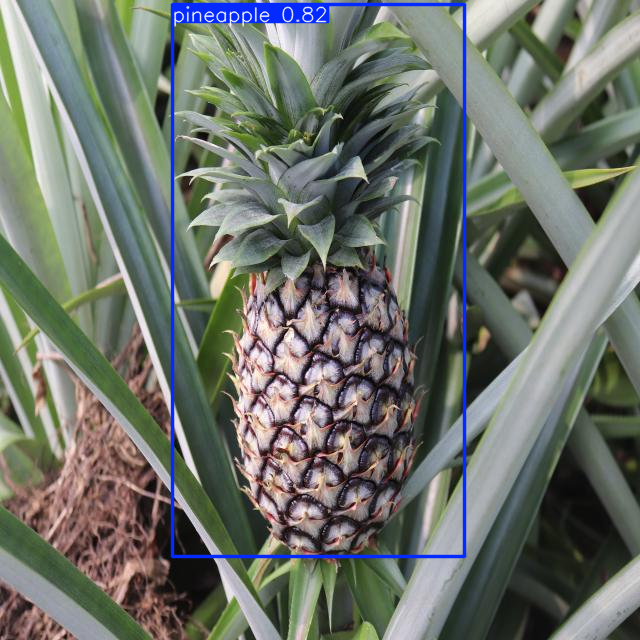


image 1/1 /content/drive/MyDrive/test/IMG_0020_JPG.rf.da1953e4b04b0acaa9b807cda9748a89.jpg: 224x224 1 pineapple, 9.0ms
Speed: 1.2ms preprocess, 9.0ms inference, 2.2ms postprocess per image at shape (1, 3, 224, 224)
Showing detections for /content/drive/MyDrive/test/IMG_0020_JPG.rf.da1953e4b04b0acaa9b807cda9748a89.jpg


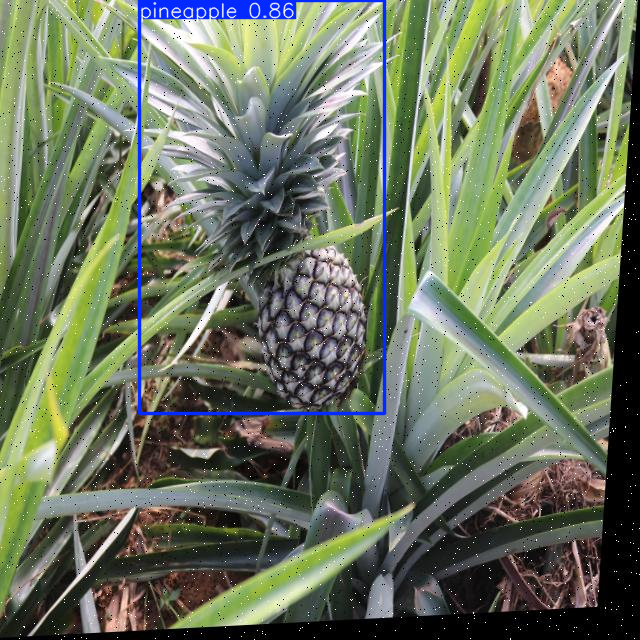


image 1/1 /content/drive/MyDrive/test/IMG_0248_JPG.rf.1ff6ca27cba150d589625f38c0a2a6ec - Copy.jpg: 224x224 1 pineapple, 13.8ms
Speed: 1.1ms preprocess, 13.8ms inference, 6.2ms postprocess per image at shape (1, 3, 224, 224)
Showing detections for /content/drive/MyDrive/test/IMG_0248_JPG.rf.1ff6ca27cba150d589625f38c0a2a6ec - Copy.jpg


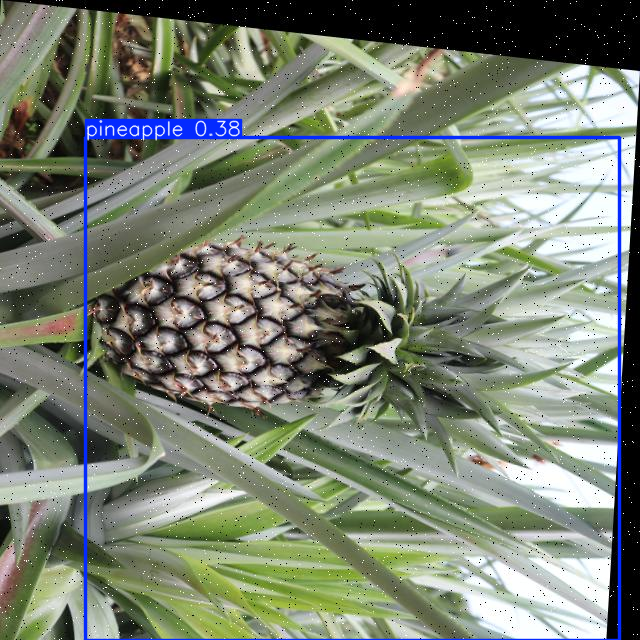


image 1/1 /content/drive/MyDrive/test/IMG_4949_JPG.rf.41e13ca80365e9e7f4d5db5e8faa6efe.jpg: 224x224 1 pineapple, 15.4ms
Speed: 1.2ms preprocess, 15.4ms inference, 6.3ms postprocess per image at shape (1, 3, 224, 224)
Showing detections for /content/drive/MyDrive/test/IMG_4949_JPG.rf.41e13ca80365e9e7f4d5db5e8faa6efe.jpg


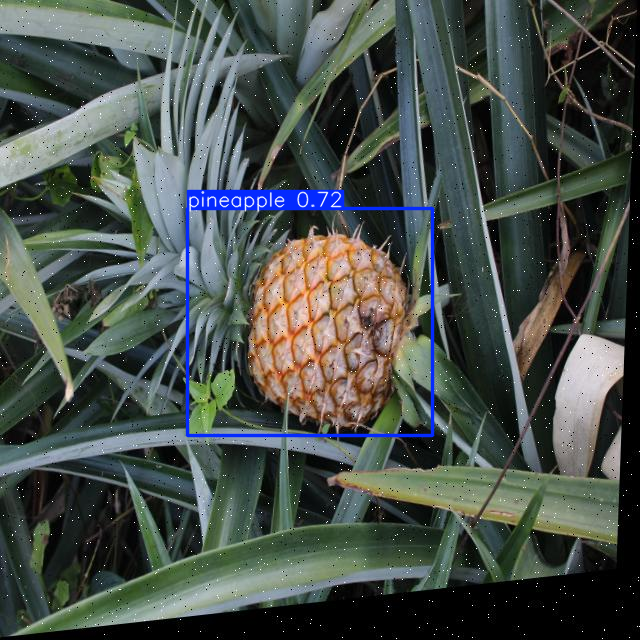


image 1/1 /content/drive/MyDrive/test/IMG_4949_JPG.rf.491734c6fc5a45b42f9d5ae7026c1364.jpg: 224x224 1 pineapple, 9.8ms
Speed: 1.3ms preprocess, 9.8ms inference, 2.2ms postprocess per image at shape (1, 3, 224, 224)
Showing detections for /content/drive/MyDrive/test/IMG_4949_JPG.rf.491734c6fc5a45b42f9d5ae7026c1364.jpg


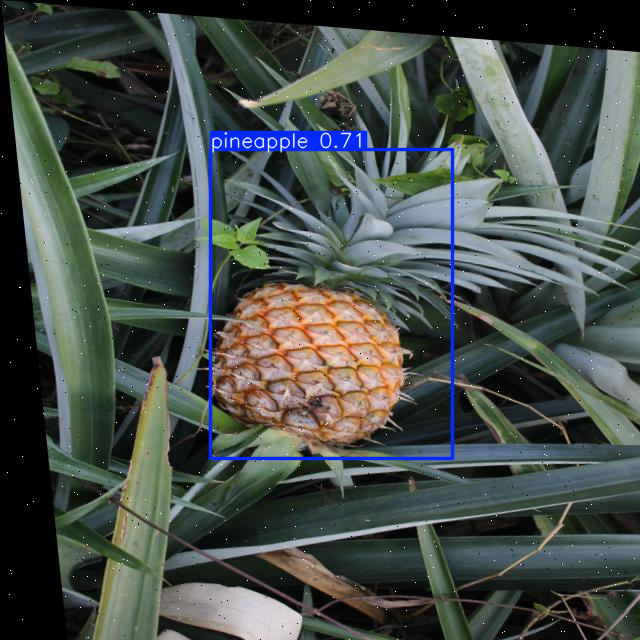

In [16]:
import os
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow

# Load trained model
model = YOLO("/content/runs/detect/train/weights/best.pt")

# Folder containing test images
image_folder = "/content/drive/MyDrive/test"
image_files = [os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png'))]

# Run prediction and display
for img_path in image_files:
    results = model.predict(source=img_path, conf=0.25)
    annotated_img = results[0].plot()
    print(f"Showing detections for {img_path}")
    cv2_imshow(annotated_img)


In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8n.yaml')  # or yolov8s.yaml, yolov8m.yaml, etc.
model.train(data='/content/data.yaml', epochs=100, imgsz=640, batch=16)


In [9]:
import os

test_imgs = os.listdir('/content/drive/MyDrive/detection/images/val')
test_labels = os.listdir('/content/drive/MyDrive/detection/labels/val')

print(f"🖼️ Test images: {len(test_imgs)}")
print(f"🏷️ Test labels: {len(test_labels)}")


🖼️ Test images: 254
🏷️ Test labels: 249


In [26]:
import os

img_dir = '/content/drive/MyDrive/detection/images/train'
label_dir = '/content/drive/MyDrive/detection/labels/train'

# Get filenames without extensions
img_names = set(os.path.splitext(f)[0] for f in os.listdir(img_dir) if f.endswith(('.jpg', '.png')))
label_names = set(os.path.splitext(f)[0] for f in os.listdir(label_dir) if f.endswith('.txt'))

# Find images without labels
unmatched_images = img_names - label_names
print(f"Unmatched images: {len(unmatched_images)}")

# Delete unmatched images
for name in unmatched_images:
    for ext in ['.jpg', '.png']:
        img_path = os.path.join(img_dir, name + ext)
        if os.path.exists(img_path):
            os.remove(img_path)
            print(f"Deleted {img_path}")

Unmatched images: 0
